In [ ]:
%%time
import random
from math import exp,sqrt
S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

values = []

for _ in range(1000000):
    ST = S0 * exp((r - 0.5 * sigma **2)*T + sigma * random.gauss(0,1)*sqrt(T))
    values.append(ST)



In [ ]:
%%time 
import numpy as np 

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2
ST = S0*np.exp((r-0.5*sigma**2)*T +
                sigma*np.random.standard_normal(1000000)*np.sqrt(T))

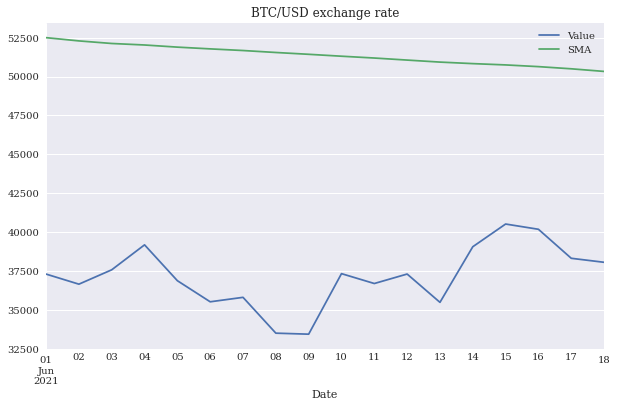

In [22]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

import configparser
c = configparser.ConfigParser()
c.read('./pyalgo.cfg')

import quandl as q
q.ApiConfig.api_key = c['quandl']['api_key']
d = q.get('BCHAIN/MKPRU')
d['SMA'] = d['Value'].rolling(100).mean()
d.loc['2013-1-1':].plot(title='BTC/USD exchange rate', figsize=(10,6))


In [2]:
# Page 53 
import configparser
import quandl as q
config = configparser.ConfigParser()
config.read('./pyalgo.cfg')

data = q.get('BCHAIN/MKPRU', api_key = config['quandl']['api_key']) # Bitcoin Market Price USD
# https://www.quandl.com/data/BCHAIN/MKPRU-Bitcoin-Market-Price-USD
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 2009-01-02 to 2021-06-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   4554 non-null   float64
dtypes: float64(1)
memory usage: 71.2 KB


In [5]:
data['Value'].resample('A').last()

Date
2009-12-31        0.000000
2010-12-31        0.299998
2011-12-31        4.470000
2012-12-31       13.570000
2013-12-31      746.900000
2014-12-31      315.700000
2015-12-31      428.230000
2016-12-31      958.120000
2017-12-31    14165.575000
2018-12-31     3791.545833
2019-12-31     7219.600000
2020-12-31    28856.590000
2021-12-31    35592.350000
Freq: A-DEC, Name: Value, dtype: float64

In [6]:
data.head(5)

,Value
Date,
2009-01-02,0.0
2009-01-03,0.0
2009-01-04,0.0
2009-01-05,0.0
2009-01-06,0.0


In [7]:
data = q.get('FSE/SAP_X', start_date='2018-1-1', end_date='2020-05-01', api_key=config['quandl']['api_key'])

In [8]:
data

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2018-01-02,93.35,93.95,92.12,92.80,None,2334984.0,2.165717e+08,None,None,None
2018-01-03,93.00,94.65,92.63,94.07,None,2346852.0,2.198772e+08,None,None,None
2018-01-11,NaN,93.74,91.04,91.43,None,4274991.0,3.934989e+08,None,None,None
2018-01-12,NaN,91.47,90.27,90.73,None,3437210.0,3.120135e+08,None,None,None
2018-01-15,NaN,90.61,89.71,90.06,None,2053812.0,1.851768e+08,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2020-04-24,106.22,108.06,105.14,106.68,None,2890515.0,3.091875e+08,None,None,None
2020-04-27,109.00,109.50,107.16,107.80,None,2106179.0,2.272643e+08,None,None,None
2020-04-28,107.66,110.12,107.60,108.84,None,3037613.0,3.307189e+08,None,None,None


In [14]:
import pandas as pd
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [15]:
raw.info

<bound method DataFrame.info of                 AAPL.O   MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX  \
Date                                                                        
2010-01-04   30.572827   30.950   20.88   133.90  173.08  113.33  1132.99   
2010-01-05   30.625684   30.960   20.87   134.69  176.14  113.63  1136.52   
2010-01-06   30.138541   30.770   20.80   132.25  174.26  113.71  1137.14   
2010-01-07   30.082827   30.452   20.60   130.00  177.67  114.19  1141.69   
2010-01-08   30.282827   30.660   20.83   133.52  174.31  114.57  1144.98   
...                ...      ...     ...      ...     ...     ...      ...   
2019-12-24  284.270000  157.380   59.41  1789.21  229.91  321.23  3223.38   
2019-12-26  289.910000  158.670   59.82  1868.77  231.21  322.94  3239.91   
2019-12-27  289.800000  158.960   60.08  1869.80  230.66  322.86  3240.02   
2019-12-30  291.520000  157.590   59.62  1846.89  229.80  321.08  3221.29   
2019-12-31  293.650000  157.700   59.85  184

In [16]:
data = pd.DataFrame(raw['EUR='])
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [17]:
data.info

<bound method DataFrame.info of              price
Date              
2010-01-04  1.4411
2010-01-05  1.4368
2010-01-06  1.4412
2010-01-07  1.4318
2010-01-08  1.4412
...            ...
2019-12-24  1.1087
2019-12-26  1.1096
2019-12-27  1.1175
2019-12-30  1.1197
2019-12-31  1.1210

[2516 rows x 1 columns]>

In [18]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

In [19]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [20]:
%matplotlib inline
from pylab import mpl,plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family']='serif'

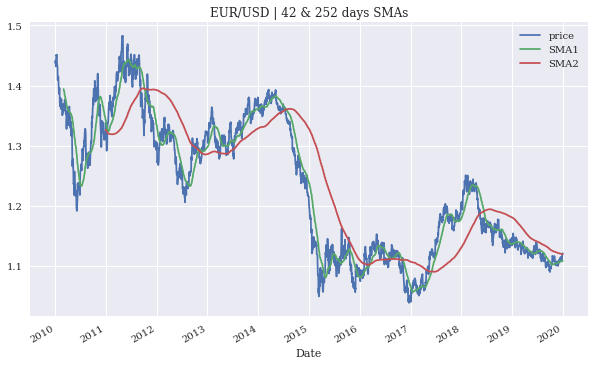

In [21]:
data.plot(title='EUR/USD | 42 & 252 days SMAs', figsize=(10, 6))

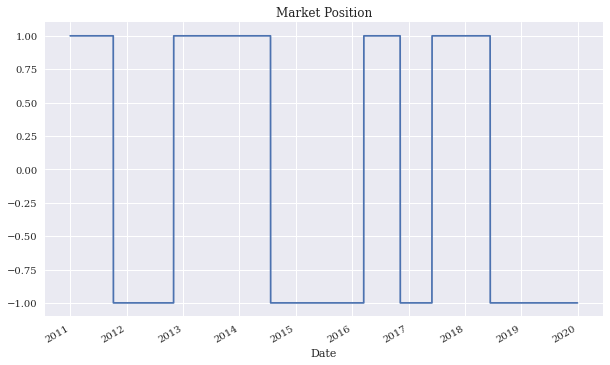

In [23]:
import numpy as np
data['position'] = np.where(data['SMA1']>data['SMA2'], 1, -1)
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1], title='Market Position', figsize=(10,6))

In [25]:
data['returns'] = np.log(data['price']/data['price'].shift(1))

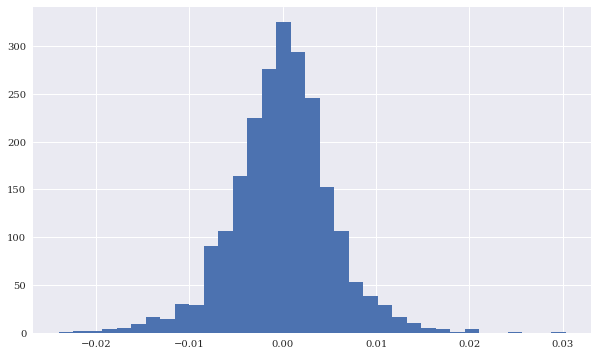

In [27]:
data['returns'].hist(bins=35, figsize=(10,6))

In [29]:
data['strategy'] = data['position'].shift(1)*data['returns']

In [30]:
data[['returns','strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [31]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

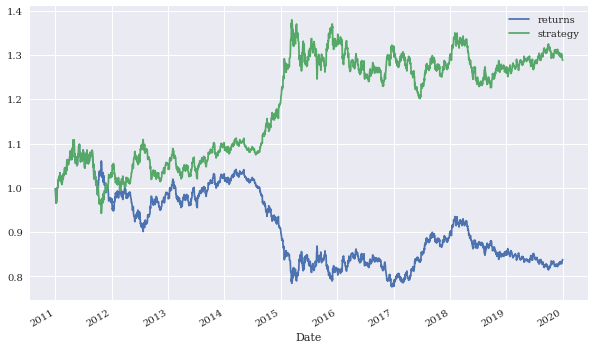

In [32]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [33]:
data[['returns','strategy']]

,returns,strategy
Date,,
2010-12-31,NaN,NaN
2011-01-03,-0.001946,-0.001946
2011-01-04,-0.003752,-0.003752
2011-01-05,-0.011341,-0.011341
2011-01-06,-0.011472,-0.011472
...,...,...
2019-12-24,0.000090,-0.000090
2019-12-26,0.000811,-0.000811
2019-12-27,0.007094,-0.007094


In [34]:
data[['returns','strategy']].mean()*252

returns    -0.019671
strategy    0.028174
dtype: float64

In [35]:
np.exp(data[['returns','strategy']].mean()*252)-1

returns    -0.019479
strategy    0.028575
dtype: float64

In [37]:
data[['returns','strategy']].std()*252**0.5

returns     0.085414
strategy    0.085405
dtype: float64

In [38]:
(data[['returns','strategy']].apply(np.exp)-1).std()*252**0.5

returns     0.085405
strategy    0.085373
dtype: float64

In [39]:
(data[['returns','strategy']].apply(np.exp)-1).std()*252**0.5

returns     0.085405
strategy    0.085373
dtype: float64

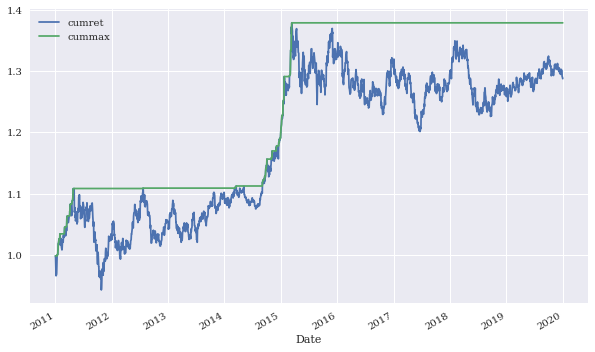

In [40]:
#calculate the annualized mean return in both log and regular space
data['cumret'] = data['strategy'].cumsum().apply(np.exp)
#calculate the annualized standard deviation in both log and regular space
data['cummax'] = data['cumret'].cummax()
data[['cumret','cummax']].dropna().plot(figsize=(10,6))

In [41]:
drawdown = data['cummax'] - data['cumret']

In [43]:
drawdown.max()

0.17779367070195917

In [45]:
# Calculates the element-wise difference between the two columns
temp = drawdown[drawdown == 0]
# Picks out the maximum value from all differences
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())

In [49]:
periods.max()

datetime.timedelta(days=596)

In [1]:
import ZXbacktesting

# smabt = SMA.SMAVectorBacktester('EUR=', 42, 252, '2010-1-1', '2019-12-31')

# smabt.run_strategy()


ModuleNotFoundError: No module named 'ZXbacktesting'

In [2]:
pip install ZXbacktesting

Note: you may need to restart the kernel to use updated packages.
